# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [24]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 500

### Step 2: Read in your data set 

In [25]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [26]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [27]:
len(df_raw)

400

Answer: There are 400 Observations in the dataset.


#### Question 2. Create a summary table

In [28]:
#function

In [29]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:  GRE have a larger STD because GRE scores  range from  200 to 800, they range 220 to 800 in our data set. Meanwhile, the GPA is based on a range from 0.00 to 4.00, they range 2.26-4.00 in our data set. T

#### Question 4. Drop data points with missing data


In [30]:
df_notnull = df_raw.dropna()
df_notnull.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [31]:
len(df_notnull)



397

We can see that the cleaned data set has 397 observations instead of 400 original observations. In order to prove that we dropped the correct number of observations, we want to pull from the original data set an rows that contained null observations.

In [32]:
df_raw[pd.isnull(df_raw).any(axis=1)]


,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Effectively we dropped the correct number of observations as these 3 observations contain null

#### Question 6. Create box plots for GRE and GPA

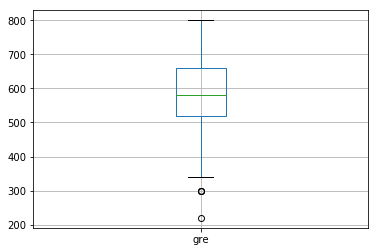

In [33]:
#boxplot 1
df_notnull.boxplot(column='gre')

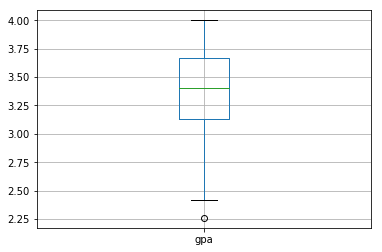

In [59]:
#boxplot 2 
df_notnull.boxplot(column='gpa')

#### Question 7. What do these plots show?

Answer:  The plots show us at a high level how the distribution of the data. They also display minimum, first quartile, median, third quartile, maximum and outliers. The gre observations have two outliers, meanwhile the gpa has one outlier. Furthermore, we can observe that the gre observations look more normally distributed, meanwhile the gpa observations seem more skewed towards higher grades.

#### Question 8. Describe each distribution 

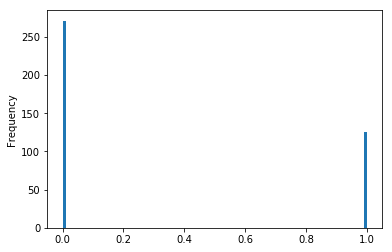

In [34]:
df_notnull['admit'].plot.hist(bins=100);

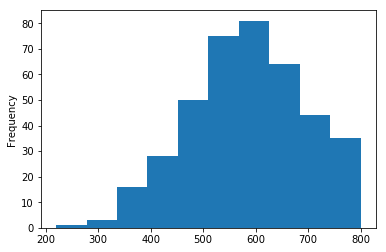

In [35]:
# plot the distribution of each variable 
df_notnull['gre'].plot.hist(bins=10);

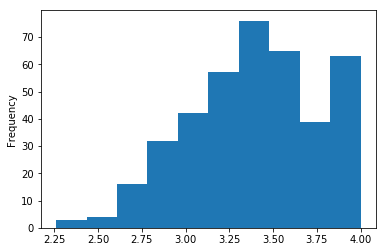

In [61]:
df_notnull['gpa'].plot.hist(bins=10);

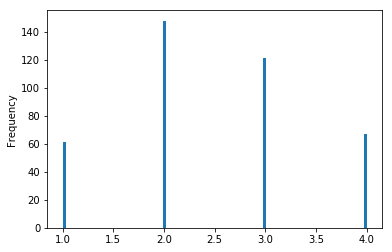

In [36]:
df_notnull['prestige'].plot.hist(bins=100);

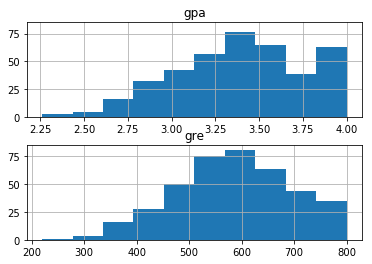

In [37]:
df_notnull.hist(column=['gre','gpa'],bins=10, layout=(2,1), sharex=False, sharey=True,);

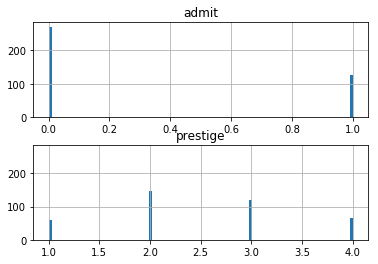

In [38]:
df_notnull.hist(column=['admit','prestige'],bins=100, layout=(2,1), sharex=False, sharey=True,);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: If our model had an assumption of a normal distribution, we could only meet that requirement for the gre variable. All other variables and outcomes are not normally distributed as their p-values for their normaltest are lower than 5%.

In [39]:
dummy_ranks = pd.get_dummies(df_notnull['prestige'], prefix='prestige')
cols_to_keep = ['admit', 'gre', 'gpa']
df_1 = df_notnull[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])


from scipy.stats import normaltest


print normaltest(df_1['gre'])
print normaltest(df_1['gpa'])
print normaltest(df_1['admit'])
print normaltest(df_1['prestige_2.0'])
print normaltest(df_1['prestige_3.0'])
print normaltest(df_1['prestige_4.0'])

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)
NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)
NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)
NormaltestResult(statistic=16.91628893783323, pvalue=0.00021216538512410486)
NormaltestResult(statistic=479.80147263514425, pvalue=6.4928297121161298e-105)
NormaltestResult(statistic=118.35955878172813, pvalue=1.9886042822902336e-26)


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: If we were to use the gre distribution to estimate the admitance variable, then we would need to correct the distribution of this variable as the admitance variable is binomial or discrete. The continuity correction factor is a way to account for the fact that a normal distribution is continuous, and a binomial is not. When you use a normal distribution to approximate a binomial distribution, you’re going to have to use a continuity correction factor. It’s as simple as adding or subtracting .5 to the discrete x-value: use the following table to decide whether to add or subtract.

Continuity Correction Factor Table   
If   P(X=n) use   P(n – 0.5 < X < n + 0.5)   
If   P(X>n) use   P(X > n + 0.5)   
If   P(X≤n) use    P(X < n + 0.5)   
If P(X<'n)  use  P(X < n – 0.5)   
If   P(X ≥ n) use P(X > n – 0.5)       

#### Question 11. Which of our variables are potentially colinear? 

In [40]:
# create a correlation matrix for the data



In [41]:
df_1.corr()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
admit,1.000000,0.181202,0.174116,0.067459,-0.122302,-0.133859
gre,0.181202,1.000000,0.382408,0.058454,-0.074380,-0.069046
gpa,0.174116,0.382408,1.000000,-0.050507,0.070881,-0.087671
prestige_2.0,0.067459,0.058454,-0.050507,1.000000,-0.510469,-0.347385
prestige_3.0,-0.122302,-0.074380,0.070881,-0.510469,1.000000,-0.298345
prestige_4.0,-0.133859,-0.069046,-0.087671,-0.347385,-0.298345,1.000000


In [42]:
df_2= df_1[df_1.admit==1]
df_2.corr()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
admit,NaN,NaN,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.232765,-0.050863,-0.010525,-0.045431
gpa,NaN,0.232765,1.000000,-0.109354,0.065609,-0.041666
prestige_2.0,NaN,-0.050863,-0.109354,1.000000,-0.455452,-0.276449
prestige_3.0,NaN,-0.010525,0.065609,-0.455452,1.000000,-0.173422
prestige_4.0,NaN,-0.045431,-0.041666,-0.276449,-0.173422,1.000000


#### Question 12. What did you find?

Answer: 

None of our variables seem to be collinear as their correlations aren't high enough.   
There seems to be a moderate correlation between gpa and gre among the applicants.  
We can see in our correlation matrix that higher prestige school applicants have a positive admitance correlation and lower prestige schools have a negative correlation with admitance.


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  We can run a regression analysis for each different school prestige category and the admittance , where the school prestige is the predicator variable and the admittance is the outcome variable. 
Y= admittance
X= Predicator Variable
a=Intercept
b= Coefficient of Predicator Variable

Y= a + b * X


The regression can be done utilizing the stats model funcion and examining the coefficients' statistical significance.

In [43]:
train_cols = df_1.columns[1:]
logit = sm.Logit(df_1['admit'], df_1[train_cols])


result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 May 2017   Pseudo R-squ.:                 0.05722
Time:                        17:16:35   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323

#### Question 14. What is your hypothesis? 

Answer:There is a relationship between applicants who attended more prestigious undergraduate schools and admissions to the graduate program.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

If we had rows where all cells in that row are NA then we could use the following to remove those observations:

df_clean = df_raw.dropna(how='all')


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

We can fill the missing data with the mean using the following:

df_3=df_raw.fillna(df_raw.mean())